In [1]:
# Load data
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = load_boston()

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dataset = pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
dataset.columns = df.feature_names

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.target.shape

(506,)

In [9]:
dataset['Price'] = df.target

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Linear Regression

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regress = LinearRegression()
mse = cross_val_score(lin_regress,X,y,scoring="neg_mean_squared_error",cv=5)
mean_mse = np.mean(mse)
mean_mse

-37.13180746769922

## Ridge Regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regression.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [14]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 100}
-29.905701947540372


## Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_regression = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=7)
lasso_regression.fit(X,y)
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-36.29882352820411


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=100)

In [18]:
ridge_pred = ridge_regression.predict(X_test)
lasso_pred = lasso_regression.predict(X_test)

In [19]:
import seaborn as sns

In [24]:
lasso_pred

array([32.41962   , 30.58126341, 24.23228257, 20.42354328, 23.09220465,
       26.12886912, 25.01859766, 23.539222  , 21.89156861, 20.09346997,
       28.2596863 , 18.61766415, 21.544969  , 16.84840301, 37.81678998,
       24.29217926, 30.1355635 , 21.11819135, 30.39778774, 34.67253121,
       32.99225351, 14.78563059, 19.73688998, 19.35046841, 13.8741876 ,
       13.77264812, 29.50394928, 17.97789897, 18.59617266, 21.55732101,
       17.75719419, 24.7895207 , 33.60083428, 25.7851669 , 28.81200334,
       29.51799813, 18.35971801, 15.66812196, 14.86644474, 24.63915134,
       24.45293184, 23.90417317, 15.05585596, 21.54161264, 30.81804555,
       27.06239072, 19.24318844, 18.30249656, 16.08501815, 14.73681983,
       24.63653177, 20.27803814, 25.94077737, 24.91415537, 11.30017981,
       14.75050909, 26.44497282, 33.61649072,  9.47439828, 20.28388223,
       15.84336797, 15.79040727, 22.02254005, 29.79346449, 23.9933334 ,
       24.57837072, 16.65891704, 30.44742326, 23.01049103, 22.32

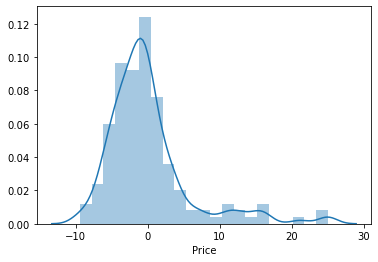

In [25]:
sns.distplot(y_test-lasso_pred)

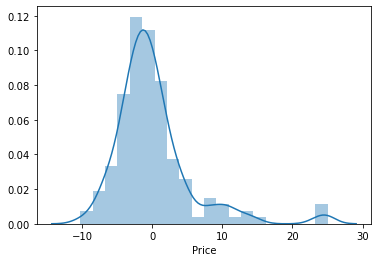

In [26]:
sns.distplot(y_test-ridge_pred)